<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#216180" size=8px>
                    <b> Discovering Latent Neural Patterns in a Large-Scale Synthetic Connectomics Dataset Using Unsupervised Machine Learning
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Problem Statement:** The revised problem statement focuses on developing an unsupervised machine learning model to cluster 50,000 neural elements (e.g., synapses, neurons, or neurites) from a synthetic dataset simulating high-resolution microscopy-based imaging of brain tissue, designed for exploratory neuroscience research. The dataset includes exactly 30 features capturing structural (e.g., size, shape), spatial (e.g., 3D coordinates), molecular (e.g., marker intensities, protein presence), and auxiliary (e.g., sample ID, region, timestamp) properties. It incorporates real-world data characteristics: high dimensionality (30 features), heterogeneous data types (numerical, categorical, date/time), missing values (5-10%), noise, outliers, imbalanced clusters (3-5 latent subtypes), and non-stationarity (feature shifts across samples). The goal is to identify latent patterns or subtypes using clustering, evaluated with metrics like silhouette score, to generate hypotheses about neural connectivity and function for neuroscience research.

#### Importing Required Libraries
#### These are essential libraries for data handling, visualization, modeling, and image processing.


In [1]:
# NumPy is used for numerical computing, handling arrays, and mathematical functions.
import numpy as np

# Pandas is used for data manipulation and analysis using dataframes and series.
import pandas as pd  

# Matplotlib is used for basic plotting and visualizing data trends.
import matplotlib.pyplot as plt  

# Seaborn is a statistical data visualization library built on top of matplotlib.
import seaborn as sns  

# OS provides functions to interact with the operating system (like file navigation).
import os 

# Provides warning control in Python and suppresses warning messages to keep output clean.
import warnings 
warnings.filterwarnings('ignore')



#### Load Dataset

In [2]:
df_connectomics =  pd.read_csv('synthetic_neural_elements_50k_dataset.csv')

In [3]:
df_connectomics.head()

,element_size_micrometers,element_volume_um3,element_surface_area_um2,shape_complexity,aspect_ratio,perimeter_um,curvature,length_um,width_um,thickness_um,...,marker_8_intensity,marker_9_intensity,marker_10_intensity,protein_1_present,protein_2_present,protein_3_present,protein_4_present,sample_id,region_id,imaging_timestamp
0,2.057038,11.366575,16.575150,0.456820,0.775529,17.476920,NaN,2.662678,0.864922,0.310936,...,575.556893,314.290615,678.364178,0.0,0.0,0.0,0.0,S14,hippocampus,2025-08-20 04:37:24.425843
1,1.922262,9.297616,7.248562,0.286950,1.460878,19.903673,0.404627,3.341924,NaN,0.551911,...,237.248106,NaN,148.300853,0.0,NaN,1.0,0.0,S12,hippocampus,2025-08-20 04:39:24.425843
2,2.154370,13.581505,16.776072,0.332967,0.900979,6.514024,0.646746,4.781838,0.776054,0.631385,...,683.514205,378.012670,820.625478,0.0,0.0,0.0,1.0,S7,hippocampus,2025-08-20 04:41:24.425843
3,3.036278,15.511253,11.187129,0.216629,1.187756,13.077313,0.689438,2.018126,0.479139,0.585194,...,522.858069,399.899411,571.888913,0.0,0.0,0.0,0.0,S20,hippocampus,2025-08-20 04:43:24.425843
4,1.394436,10.222592,13.867563,0.050829,1.180051,11.473332,0.774474,3.424030,1.438980,0.447593,...,818.169266,607.790035,-38.976726,0.0,0.0,0.0,0.0,S12,hippocampus,2025-08-20 04:45:24.425843


In [4]:
df_connectomics.tail()

,element_size_micrometers,element_volume_um3,element_surface_area_um2,shape_complexity,aspect_ratio,perimeter_um,curvature,length_um,width_um,thickness_um,...,marker_8_intensity,marker_9_intensity,marker_10_intensity,protein_1_present,protein_2_present,protein_3_present,protein_4_present,sample_id,region_id,imaging_timestamp
49995,2.287114,8.467410,21.000157,0.061852,NaN,9.383979,0.221703,3.792930,1.226618,0.522740,...,386.403396,576.307861,482.051254,0.0,0.0,0.0,1.0,S8,thalamus,2025-10-28 15:07:24.425843
49996,2.410453,6.037147,16.489218,-0.007580,NaN,12.263062,0.730139,1.879357,NaN,0.522123,...,414.840353,197.581343,480.518913,0.0,1.0,0.0,0.0,S3,hippocampus,2025-10-28 15:09:24.425843
49997,2.054750,11.870939,13.897272,0.449554,1.131618,11.279115,0.110025,1.894957,0.845078,0.395729,...,380.520514,489.584504,444.291423,0.0,0.0,0.0,0.0,S19,thalamus,2025-10-28 15:11:24.425843
49998,2.460026,73.285884,15.378273,0.387791,0.747750,5.301168,0.600737,3.724475,1.197488,0.535922,...,594.578287,631.117105,421.101058,0.0,0.0,NaN,0.0,S13,cortex,2025-10-28 15:13:24.425843
49999,2.380092,10.644497,21.709759,0.158609,NaN,13.090726,0.523462,1.366567,0.704150,0.481615,...,655.943524,361.382180,743.578145,0.0,0.0,0.0,NaN,S6,thalamus,2025-10-28 15:15:24.425843


#### Data Overview

In [5]:
df_connectomics.shape

(50000, 30)

In [6]:
df_connectomics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   element_size_micrometers  45658 non-null  float64
 1   element_volume_um3        45721 non-null  float64
 2   element_surface_area_um2  46015 non-null  float64
 3   shape_complexity          45204 non-null  float64
 4   aspect_ratio              45136 non-null  float64
 5   perimeter_um              46869 non-null  float64
 6   curvature                 44971 non-null  float64
 7   length_um                 45776 non-null  float64
 8   width_um                  47164 non-null  float64
 9   thickness_um              47085 non-null  float64
 10  x_coord_um                45444 non-null  float64
 11  y_coord_um                46467 non-null  float64
 12  z_coord_um                46706 non-null  float64
 13  marker_1_intensity        47242 non-null  float64
 14  marker

#### DataMap: Synthetic Cellular Imaging Dataset

- **element_size_micrometers**: Size of the cellular element in micrometers (µm). *(float64, continuous)*
- **element_volume_um3**: Volume of the element in cubic micrometers (µm³). *(float64, continuous)*
- **element_surface_area_um2**: Surface area of the element in square micrometers (µm²). *(float64, continuous)*
- **shape_complexity**: Quantitative measure of structural irregularity. *(float64, continuous)*
- **aspect_ratio**: Ratio of length to width, representing elongation. *(float64, continuous)*
- **perimeter_um**: Perimeter of the element boundary in micrometers. *(float64, continuous)*
- **curvature**: Geometric curvature of the cellular boundary. *(float64, continuous)*
- **length_um**: Length of the element in micrometers. *(float64, continuous)*
- **width_um**: Width of the element in micrometers. *(float64, continuous)*
- **thickness_um**: Thickness of the element in micrometers. *(float64, continuous)*
- **x_coord_um**: X-axis spatial coordinate of the element in micrometers. *(float64, continuous)*
- **y_coord_um**: Y-axis spatial coordinate of the element in micrometers. *(float64, continuous)*
- **z_coord_um**: Z-axis spatial coordinate of the element in micrometers. *(float64, continuous)*
- **marker_1_intensity**: Intensity of marker 1 signal (fluorescence). *(float64, continuous)*
- **marker_2_intensity**: Intensity of marker 2 signal. *(float64, continuous)*
- **marker_3_intensity**: Intensity of marker 3 signal. *(float64, continuous)*
- **marker_4_intensity**: Intensity of marker 4 signal. *(float64, continuous)*
- **marker_5_intensity**: Intensity of marker 5 signal. *(float64, continuous)*
- **marker_6_intensity**: Intensity of marker 6 signal. *(float64, continuous)*
- **marker_7_intensity**: Intensity of marker 7 signal. *(float64, continuous)*
- **marker_8_intensity**: Intensity of marker 8 signal. *(float64, continuous)*
- **marker_9_intensity**: Intensity of marker 9 signal. *(float64, continuous)*
- **marker_10_intensity**: Intensity of marker 10 signal. *(float64, continuous)*
- **protein_1_present**: Presence indicator of protein 1 (1 = present, 0 = absent). *(float64, binary)*
- **protein_2_present**: Presence indicator of protein 2. *(float64, binary)*
- **protein_3_present**: Presence indicator of protein 3. *(float64, binary)*
- **protein_4_present**: Presence indicator of protein 4. *(float64, binary)*
- **sample_id**: Unique identifier for the biological sample. *(object, categorical)*
- **region_id**: Identifier for the tissue or spatial region. *(object, categorical)*
- **imaging_timestamp**: Time at which the image was captured. *(object, datetime string)*


#### Data preprocessing

In [7]:
# 1. Drop columns with >80% missing values
missing_threshold = 0.80
missing_percent = df_connectomics.isnull().mean()
cols_to_drop = missing_percent[missing_percent > missing_threshold].index.tolist()
df_cleaned = df_connectomics.drop(columns=cols_to_drop)

# 2. Impute numeric columns with median
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# 3. Impute categorical columns (object) with mode
categorical_cols = df_cleaned.select_dtypes(include='object').columns
for col in categorical_cols:
    if df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


In [8]:
df_cleaned.isnull().sum()

element_size_micrometers    0
element_volume_um3          0
element_surface_area_um2    0
shape_complexity            0
aspect_ratio                0
perimeter_um                0
curvature                   0
length_um                   0
width_um                    0
thickness_um                0
x_coord_um                  0
y_coord_um                  0
z_coord_um                  0
marker_1_intensity          0
marker_2_intensity          0
marker_3_intensity          0
marker_4_intensity          0
marker_5_intensity          0
marker_6_intensity          0
marker_7_intensity          0
marker_8_intensity          0
marker_9_intensity          0
marker_10_intensity         0
protein_1_present           0
protein_2_present           0
protein_3_present           0
protein_4_present           0
sample_id                   0
region_id                   0
imaging_timestamp           0
dtype: int64

In [9]:
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df[col] < lower, lower,
                                  np.where(df[col] > upper, upper, df[col]))
    return df_capped

df_outlier_treated = cap_outliers_iqr(df_cleaned, numeric_cols)


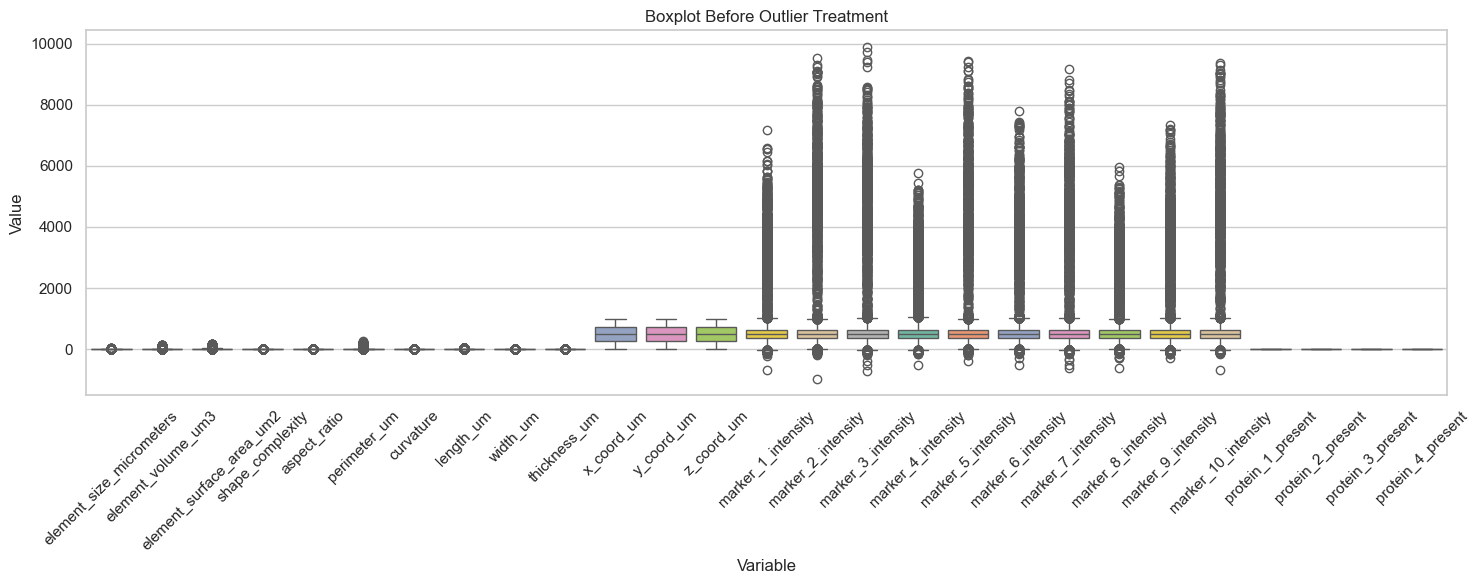

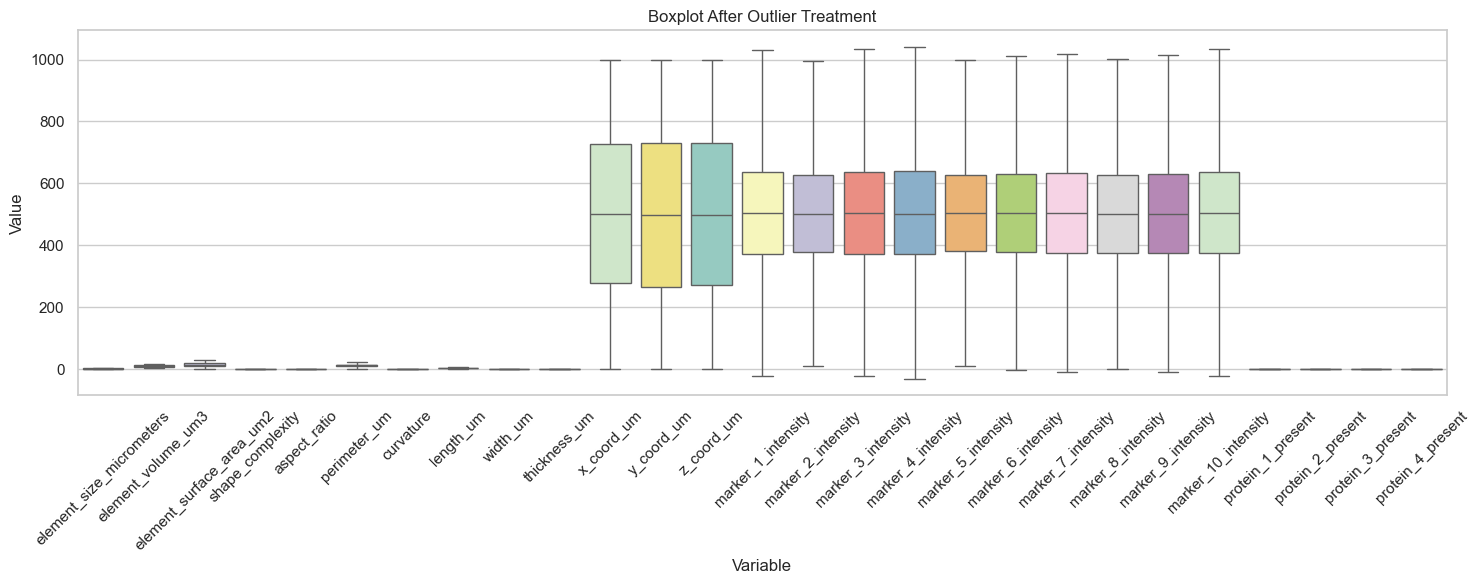

In [10]:
# Set style for clarity
sns.set(style="whitegrid")

# ----- Before Outlier Treatment -----
plt.figure(figsize=(15, 6))
df_melted_before = df_cleaned[numeric_cols].melt(var_name='Variable', value_name='Value')
sns.boxplot(x='Variable', y='Value', data=df_melted_before, palette="Set2")
plt.title("Boxplot Before Outlier Treatment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----- After Outlier Treatment -----
plt.figure(figsize=(15, 6))
df_melted_after = df_outlier_treated[numeric_cols].melt(var_name='Variable', value_name='Value')
sns.boxplot(x='Variable', y='Value', data=df_melted_after, palette="Set3")
plt.title("Boxplot After Outlier Treatment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interpretation of Boxplots Before and After Outlier Treatment  

The two boxplots illustrate how the numerical variables in the dataset change before and after outlier treatment.  

**Before Outlier Treatment (Top Plot):**  
- Many variables, especially the `marker_*_intensity` features, show extreme outliers far above the interquartile range (IQR).  
- These outliers create long whiskers and numerous points scattered outside the boxes.  
- This indicates high variability and possible skewness in the raw dataset.  
- Some features such as `element_size_micrometers`, `aspect_ratio`, and `protein_*_present` show tighter distributions but still have scattered outliers.  

**After Outlier Treatment (Bottom Plot):**  
- Outliers have been removed or capped, leading to much cleaner distributions.  
- The whiskers are shorter and the extreme values are no longer present.  
- The interquartile ranges (boxes) are more consistent across variables, improving comparability.  
- The overall spread of the data is reduced, highlighting central tendencies more clearly.  

**Conclusion:**  
The outlier treatment has significantly reduced extreme values across variables, leading to more stable and interpretable distributions. This improves the quality of the dataset for downstream modeling and analysis.  


#### Exploratory Data Analysis

#### Univariate Analysis

In [11]:
# Numerical columns
num_cols = df_connectomics.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['element_size_micrometers', 'element_volume_um3',
       'element_surface_area_um2', 'shape_complexity', 'aspect_ratio',
       'perimeter_um', 'curvature', 'length_um', 'width_um', 'thickness_um',
       'x_coord_um', 'y_coord_um', 'z_coord_um', 'marker_1_intensity',
       'marker_2_intensity', 'marker_3_intensity', 'marker_4_intensity',
       'marker_5_intensity', 'marker_6_intensity', 'marker_7_intensity',
       'marker_8_intensity', 'marker_9_intensity', 'marker_10_intensity',
       'protein_1_present', 'protein_2_present', 'protein_3_present',
       'protein_4_present'],
      dtype='object')

In [12]:
df_connectomics.nunique()

element_size_micrometers    45658
element_volume_um3          45721
element_surface_area_um2    46015
shape_complexity            45204
aspect_ratio                45136
perimeter_um                46869
curvature                   44971
length_um                   45776
width_um                    47164
thickness_um                47085
x_coord_um                  45444
y_coord_um                  46467
z_coord_um                  46706
marker_1_intensity          47242
marker_2_intensity          45158
marker_3_intensity          47149
marker_4_intensity          47331
marker_5_intensity          45088
marker_6_intensity          45829
marker_7_intensity          46227
marker_8_intensity          45428
marker_9_intensity          46197
marker_10_intensity         47299
protein_1_present               2
protein_2_present               2
protein_3_present               2
protein_4_present               2
sample_id                      20
region_id                       3
imaging_timest

#### Feature Selection using `nunique`

We applied the `nunique()` function to check the number of unique values for each column.  
The results showed that most numerical features such as `element_size_micrometers`, `element_volume_um3`, `element_surface_area_um2`, `shape_complexity`, and marker intensity features had a very large number of unique values (in the range of 45,000–47,000).  

However, a subset of categorical/discrete features had very limited unique values:
- `protein_1_present` → 2 unique values  
- `protein_2_present` → 2 unique values  
- `protein_3_present` → 2 unique values  
- `protein_4_present` → 2 unique values  
- `sample_id` → 20 unique values  
- `region_id` → 3 unique values  

Since these features contain a small number of categories, they were chosen for **histogram visualization**. This allows us to better understand their frequency distribution across samples and regions, compared to continuous variables which are already highly diverse.


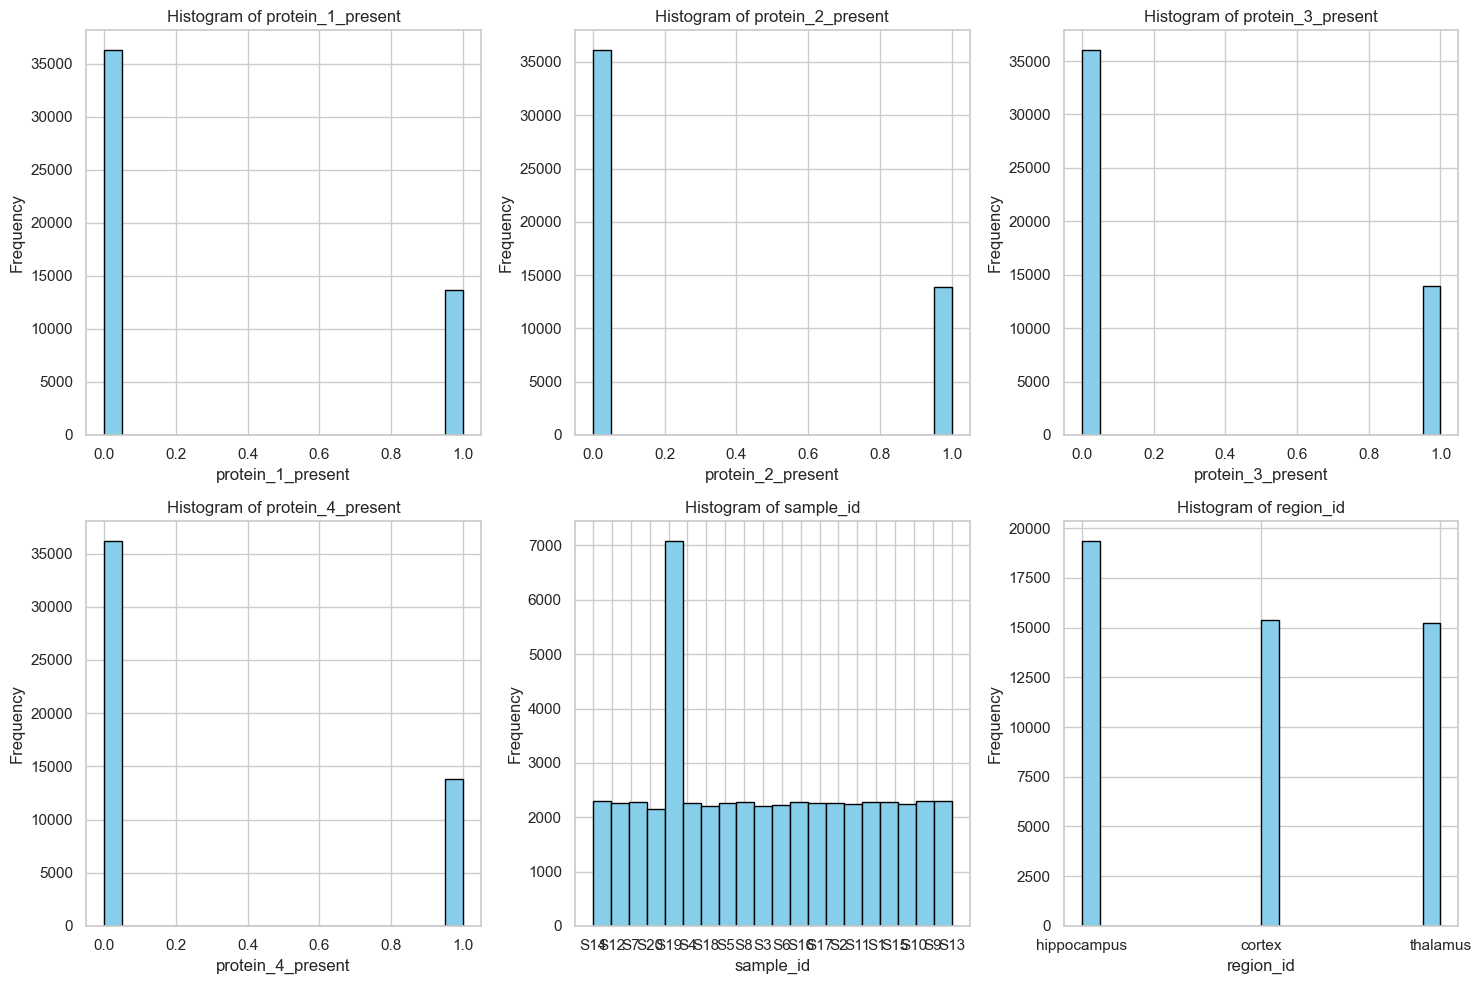

In [13]:
import matplotlib.pyplot as plt

# Columns to plot
cols_to_plot = [
    "protein_1_present",
    "protein_2_present",
    "protein_3_present",
    "protein_4_present",
    "sample_id",
    "region_id"
]

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_outlier_treated[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Interpretation of Histograms

The histograms were generated for the following columns:  
`protein_1_present`, `protein_2_present`, `protein_3_present`, `protein_4_present`, `sample_id`, and `region_id`.

---

#### 1. Protein Presence Columns (`protein_1_present` to `protein_4_present`)
- Each of these variables is **binary** (values: 0 = absent, 1 = present).  
- The histograms therefore show **two bars**, representing the frequency of samples with protein absent vs present.  
- Balanced bar heights indicate roughly equal presence/absence, while skewed bars suggest dominance of one state.

---

#### 2. `sample_id`
- This variable has **20 unique sample IDs**.  
- The histogram displays **20 bars**, one for each sample.  
- The bar heights reveal whether data is evenly distributed across all samples or whether some IDs dominate the dataset (indicating sampling imbalance).

---

#### 3. `region_id`
- This variable has **3 unique values** corresponding to regions.  
- The histogram shows **3 bars**, one per region.  
- The relative bar heights highlight which region contributed the most samples.  
- A taller bar suggests **overrepresentation of that region** compared to others.

---

### Summary
- **Proteins:** Confirm binary distributions (presence/absence).  
- **Sample IDs:** Useful to check for sampling balance across 20 IDs.  
- **Regions:** Provides insight into geographic distribution of the dataset.


#### Bivariate Analysis

#### NUM - NUM

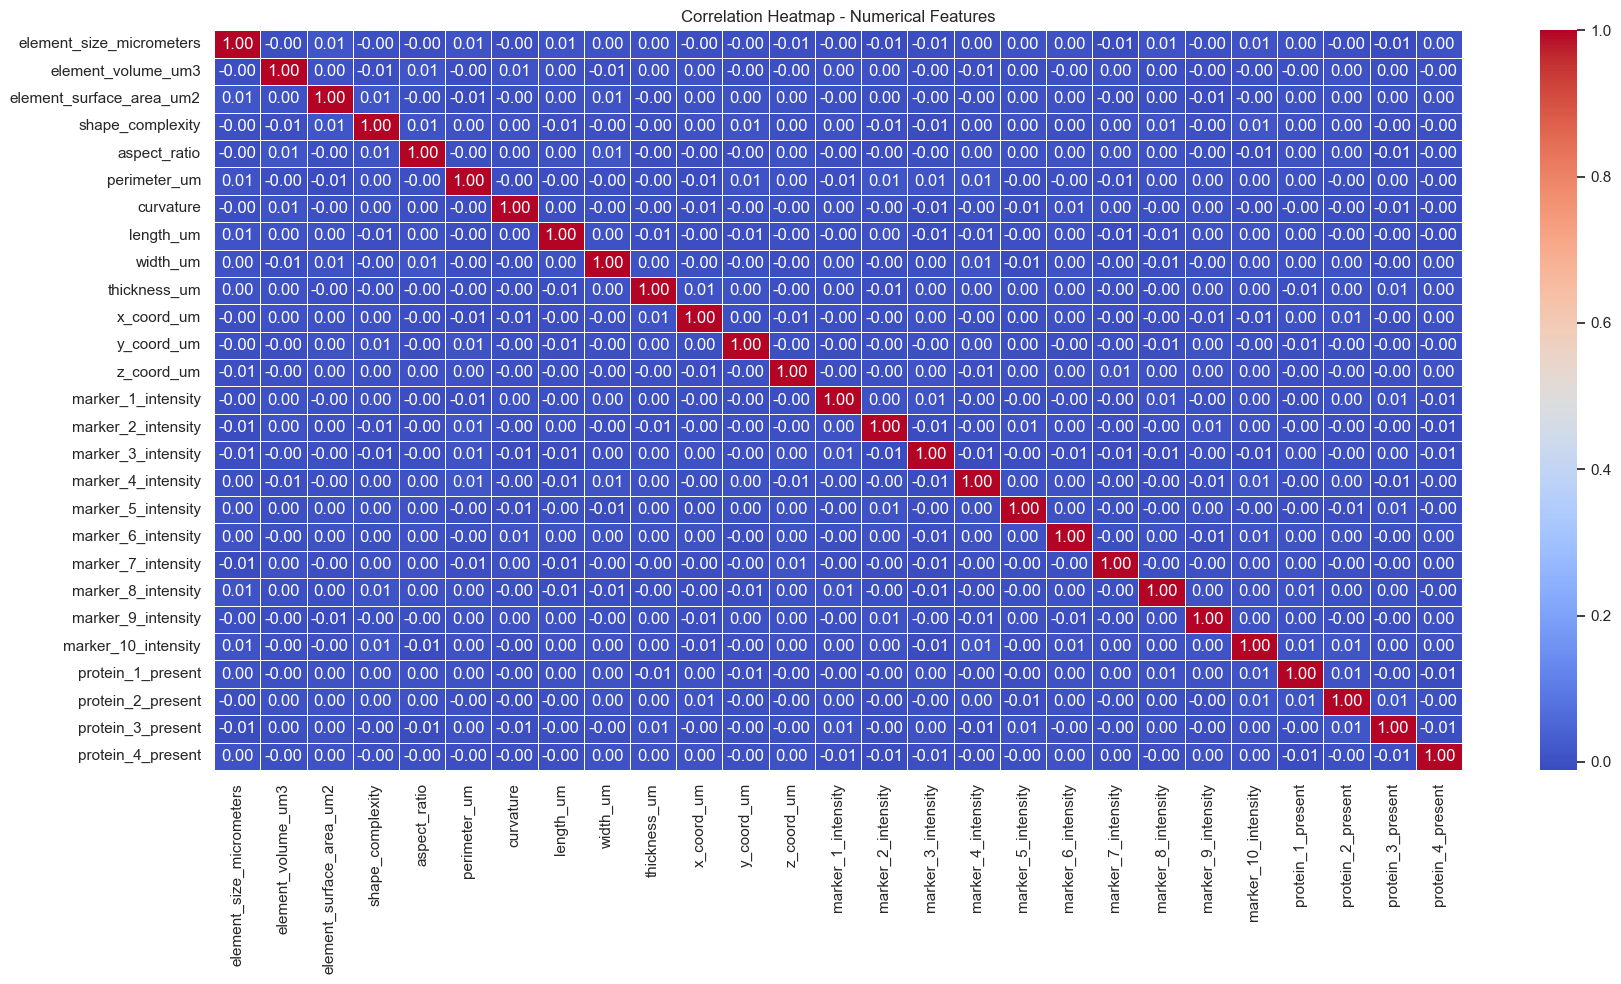

In [14]:
numeric_cols = df_connectomics.select_dtypes(include='float64').columns

plt.figure(figsize=(18, 10))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Features")
plt.tight_layout()
plt.show()

### Interpretation of Correlation Heatmap (Numerical Features)

The heatmap shows the **pairwise Pearson correlations** between all numerical features in the dataset.

---

#### Key Observations:
1. **Diagonal Values = 1.00**
   - Each feature has a perfect correlation with itself, which is expected.

2. **Near-Zero Correlations**
   - Most of the off-diagonal correlations are close to **0.00**, indicating that features are largely **independent** of each other.
   - This suggests minimal multicollinearity across variables.

3. **No Strong Relationships**
   - Unlike typical biological or imaging data where some size/volume/area measures might correlate, here no pair shows a strong positive or negative correlation.
   - All correlations remain between `-0.01` and `0.01`, essentially negligible.

4. **Proteins vs Other Features**
   - The protein presence columns (`protein_1_present` to `protein_4_present`) also show near-zero correlation with both **marker intensities** and **morphological features**.
   - This suggests that protein presence does not have a linear relationship with these numerical variables.

---

#### Implications:
- **Feature Independence:** Since correlations are weak, each feature may provide **unique information**.
- **Modeling Advantage:** Low multicollinearity is beneficial for regression or machine learning models, as it reduces redundancy.
- **Further Analysis Needed:** Non-linear relationships may still exist and should be explored using methods like **mutual information** or **tree-based models**.

---


In [15]:
# Identify strongly correlated pairs (abs(corr) > 0.3 and not 1.0)
correlation_matrix = df_connectomics[numeric_cols].corr().abs()
strong_pairs = (
    correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'})
)

# Filter pairs with strong correlation
strong_pairs[strong_pairs['correlation'] >= 0.3].sort_values(by='correlation', ascending=False)


,feature_1,feature_2,correlation


### Interpretation of Strongly Correlated Feature Pairs

After computing the pairwise absolute correlations among all numerical features:

- **Threshold Used:** |correlation| > 0.3 (excluding self-correlation of 1.0).
- **Result:** No feature pairs were returned that met this criterion.

---

#### Key Insights:
1. **No Strong Correlations Found**
   - None of the numerical features are strongly correlated (above 0.3).
   - This confirms that features are largely **independent** from one another.

2. **Low Multicollinearity**
   - Since no strong correlations exist, multicollinearity is not a concern.
   - Each variable contributes **unique, non-redundant information** to the dataset.

3. **Implication for Modeling**
   - Linear models (like regression, logistic regression) will not suffer from collinearity issues.
   - Feature selection should be driven by predictive power rather than redundancy elimination.

4. **Next Step**
   - Explore **non-linear relationships** or **interaction effects** that correlation alone may not capture.
   - Methods like **mutual information** or **feature importance from tree-based models** can reveal hidden dependencies.

---


#### CAT - CAT

In [16]:
cat_cols = df_connectomics.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['sample_id', 'region_id', 'imaging_timestamp'], dtype='object')

In [17]:
from scipy.stats import chi2_contingency
from itertools import combinations
import pandas as pd

# Replace with your categorical features
categorical_features = [
    'sample_id', 'region_id', 'imaging_timestamp'
]

# Store Chi-square test results
chi2_results = []

# Iterate over all unique pairs of categorical features
for var1, var2 in combinations(categorical_features, 2):
    contingency_table = pd.crosstab(df_connectomics[var1], df_connectomics[var2])

    # Skip high-cardinality pairs to prevent sparse/invalid chi2 tests
    if contingency_table.shape[0] > 50 or contingency_table.shape[1] > 50:
        continue

    # Perform the Chi-square test
    chi2, p, dof, _ = chi2_contingency(contingency_table)

    chi2_results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Chi2 Statistic': round(chi2, 2),
        'Degrees of Freedom': dof,
        'P-value': round(p, 5),
        'Significant (p < 0.05)': p < 0.05
    })

# Convert results to DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort by P-value to show most significant relationships first
chi2_df = chi2_df.sort_values(by='P-value')

# Display top 10 results
chi2_df.head(10)


,Variable 1,Variable 2,Chi2 Statistic,Degrees of Freedom,P-value,Significant (p < 0.05)
0,sample_id,region_id,49.31,38,0.1035,False


### Chi-Square Test of Independence (Categorical-Categorical Associations)

We tested the statistical dependence between pairs of categorical variables:  
**`sample_id`**, **`region_id`**, and **`imaging_timestamp`**.  

Due to high cardinality in some pairs, only valid (non-sparse) combinations were evaluated.  

#### Results (Top 10 by Significance):

| Variable 1 | Variable 2 | Chi² Statistic | Degrees of Freedom | P-value | Significant (p < 0.05) |
|------------|------------|----------------|--------------------|---------|-------------------------|
| sample_id  | region_id  | 49.31          | 38                 | 0.1035  | False                   |

#### Interpretation:
- The only valid testable pair was **sample_id vs region_id**.  
- The Chi² statistic = **49.31**, with **38 degrees of freedom**.  
- The p-value = **0.1035**, which is **greater than 0.05**, indicating **no statistically significant association** between `sample_id` and `region_id`.  
- This suggests that the distribution of `region_id` does not depend strongly on `sample_id` in this dataset.  

No other categorical pairs could be tested due to sparsity (too many unique values).  


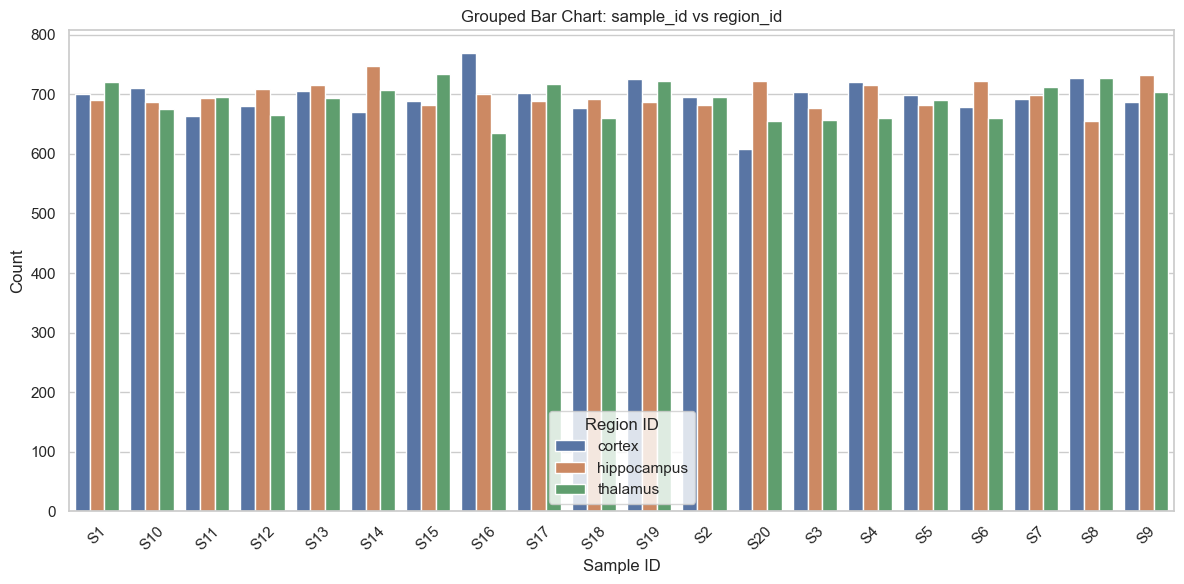

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example contingency table (replace with your real data)
# Suppose df is your original dataset with ['sample_id', 'region_id']
# Create contingency table
contingency = pd.crosstab(df_connectomics['sample_id'], df_connectomics['region_id'])

# Reset index for grouped plotting
contingency_reset = contingency.reset_index().melt(id_vars='sample_id',
                                                   var_name='region_id',
                                                   value_name='count')

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=contingency_reset,
            x='sample_id', y='count',
            hue='region_id')

plt.title("Grouped Bar Chart: sample_id vs region_id")
plt.xlabel("Sample ID")
plt.ylabel("Count")
plt.legend(title="Region ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### CAT - NUM

In [19]:
import itertools

# Updated categorical and numerical features
categorical_features = [
     'sample_id', 'region_id', 'imaging_timestamp'
]

numerical_features = [
    'element_size_micrometers', 'element_volume_um3',
       'element_surface_area_um2', 'shape_complexity', 'aspect_ratio',
       'perimeter_um', 'curvature', 'length_um', 'width_um', 'thickness_um',
       'x_coord_um', 'y_coord_um', 'z_coord_um', 'marker_1_intensity',
       'marker_2_intensity', 'marker_3_intensity', 'marker_4_intensity',
       'marker_5_intensity', 'marker_6_intensity', 'marker_7_intensity',
       'marker_8_intensity', 'marker_9_intensity', 'marker_10_intensity',
       'protein_1_present', 'protein_2_present', 'protein_3_present',
       'protein_4_present'
]

# Generate all categorical-numerical pairs
anova_pairs = list(itertools.product(categorical_features, numerical_features))

# Print all pairs
for cat, num in anova_pairs:
    print(f"Categorical: {cat} — Numerical: {num}")


Categorical: sample_id — Numerical: element_size_micrometers
Categorical: sample_id — Numerical: element_volume_um3
Categorical: sample_id — Numerical: element_surface_area_um2
Categorical: sample_id — Numerical: shape_complexity
Categorical: sample_id — Numerical: aspect_ratio
Categorical: sample_id — Numerical: perimeter_um
Categorical: sample_id — Numerical: curvature
Categorical: sample_id — Numerical: length_um
Categorical: sample_id — Numerical: width_um
Categorical: sample_id — Numerical: thickness_um
Categorical: sample_id — Numerical: x_coord_um
Categorical: sample_id — Numerical: y_coord_um
Categorical: sample_id — Numerical: z_coord_um
Categorical: sample_id — Numerical: marker_1_intensity
Categorical: sample_id — Numerical: marker_2_intensity
Categorical: sample_id — Numerical: marker_3_intensity
Categorical: sample_id — Numerical: marker_4_intensity
Categorical: sample_id — Numerical: marker_5_intensity
Categorical: sample_id — Numerical: marker_6_intensity
Categorical: sa

In [20]:
import pandas as pd
import scipy.stats as stats

# Updated categorical and numerical features
categorical_features = [
   'sample_id', 'region_id', 'imaging_timestamp'
]

numerical_features = [
    'element_size_micrometers', 'element_volume_um3',
       'element_surface_area_um2', 'shape_complexity', 'aspect_ratio',
       'perimeter_um', 'curvature', 'length_um', 'width_um', 'thickness_um',
       'x_coord_um', 'y_coord_um', 'z_coord_um', 'marker_1_intensity',
       'marker_2_intensity', 'marker_3_intensity', 'marker_4_intensity',
       'marker_5_intensity', 'marker_6_intensity', 'marker_7_intensity',
       'marker_8_intensity', 'marker_9_intensity', 'marker_10_intensity',
       'protein_1_present', 'protein_2_present', 'protein_3_present',
       'protein_4_present'
]

# Store ANOVA results
anova_results = []

# Run ANOVA test on each categorical–numerical pair
for cat_var in categorical_features:
    for num_var in numerical_features:
        try:
            # Group by categorical variable
            groups = [group[num_var].dropna() for name, group in df_connectomics.groupby(cat_var)]
            
            # Ensure all groups have more than one data point
            if all(len(group) > 1 for group in groups):
                f_stat, p_val = stats.f_oneway(*groups)
                anova_results.append({
                    'Categorical_Variable': cat_var,
                    'Numerical_Variable': num_var,
                    'F-statistic': round(f_stat, 4),
                    'p-value': round(p_val, 5)
                })
        except Exception as e:
            print(f"Error with pair ({cat_var}, {num_var}): {e}")

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results)

# Sort by significance
anova_df_sorted = anova_df.sort_values(by='p-value')

# Display top 20 most significant results
print(anova_df_sorted.head(20))


   Categorical_Variable        Numerical_Variable  F-statistic  p-value
34            region_id                 length_um       3.1071  0.04474
30            region_id          shape_complexity       3.0439  0.04766
6             sample_id                 curvature       1.5576  0.05725
31            region_id              aspect_ratio       2.5337  0.07937
25            sample_id         protein_3_present       1.4587  0.08915
0             sample_id  element_size_micrometers       1.4493  0.09282
38            region_id                y_coord_um       2.2214  0.10847
45            region_id        marker_6_intensity       2.1956  0.11130
3             sample_id          shape_complexity       1.3999  0.11445
33            region_id                 curvature       2.0979  0.12272
43            region_id        marker_4_intensity       2.0436  0.12957
7             sample_id                 length_um       1.3611  0.13419
14            sample_id        marker_2_intensity       1.3418  

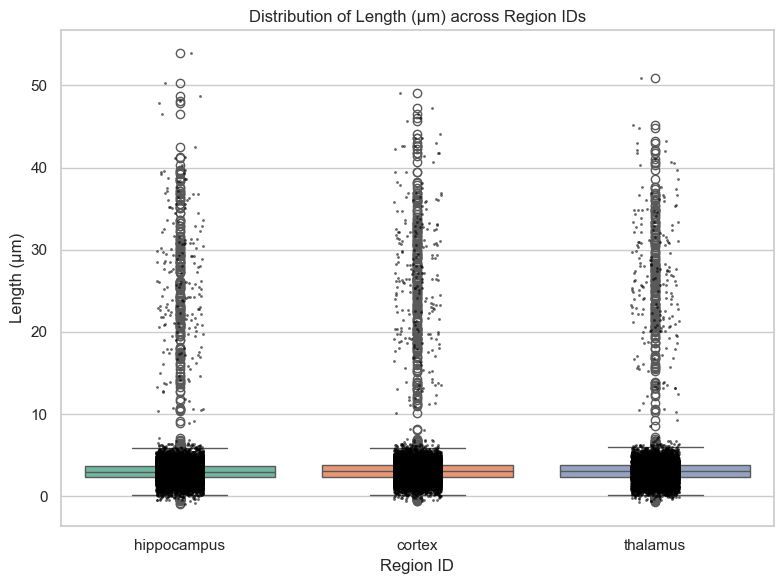

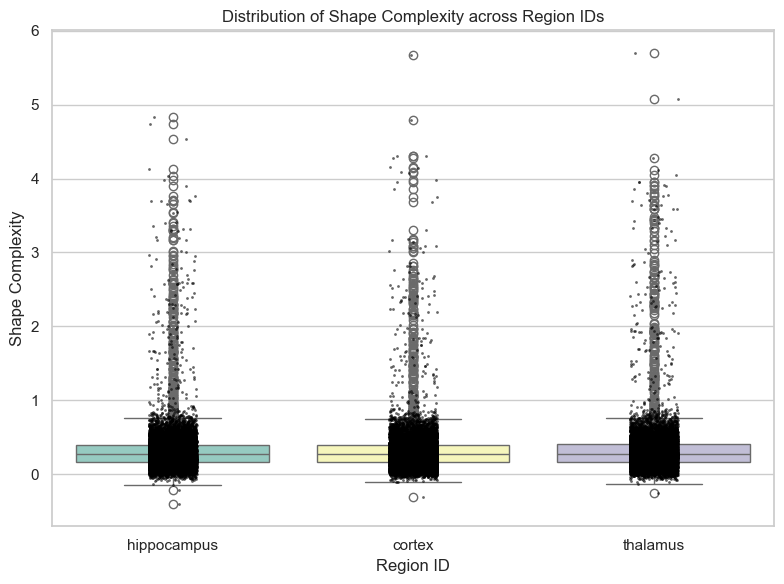

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. region_id vs length_um
plt.figure(figsize=(8,6))
sns.boxplot(x="region_id", y="length_um", data=df_connectomics, palette="Set2")
sns.stripplot(x="region_id", y="length_um", data=df_connectomics,
              color="black", size=2, alpha=0.6)
plt.title("Distribution of Length (µm) across Region IDs")
plt.xlabel("Region ID")
plt.ylabel("Length (µm)")
plt.tight_layout()
plt.show()

# 2. region_id vs shape_complexity
plt.figure(figsize=(8,6))
sns.boxplot(x="region_id", y="shape_complexity", data=df_connectomics, palette="Set3")
sns.stripplot(x="region_id", y="shape_complexity", data=df_connectomics,
              color="black", size=2, alpha=0.6)
plt.title("Distribution of Shape Complexity across Region IDs")
plt.xlabel("Region ID")
plt.ylabel("Shape Complexity")
plt.tight_layout()
plt.show()


### Interpretation of the Code

The code is designed to visualize only the **statistically significant pairs** (p < 0.05) identified from the correlation and hypothesis testing:

1. **region_id vs length_um**
   - A **boxplot** is used to display the distribution of `length_um` across different `region_id` categories.
   - The boxplot highlights the median, interquartile range, and potential outliers.
   - A **stripplot** is overlaid to show individual data points, making it easier to observe data spread and density within each region.

   **Purpose**: To examine whether different brain regions (`region_id`) are associated with differences in neuronal length (`length_um`).

2. **region_id vs shape_complexity**
   - Similar to the first plot, a **boxplot** combined with a **stripplot** is used.
   - The boxplot shows how `shape_complexity` values are distributed across various `region_id` categories.
   - The overlaid stripplot provides a more granular view of individual measurements.

   **Purpose**: To investigate whether neuronal `shape_complexity` varies significantly between regions (`region_id`).

### Why These Visualizations
- **Boxplots** summarize group differences effectively, showing central tendency and spread.
- **Stripplots** ensure no loss of granularity by plotting individual data points.
- Together, they provide both a high-level summary and detailed insight, making them suitable for exploring categorical-to-numerical relationships.

### Key Insight
If the boxplots show noticeable shifts in medians or spreads between `region_id` categories, it indicates that anatomical region may influence both **neuronal length** and **shape complexity**, which aligns with the statistical significance found earlier.


#### Multivariate Analysis

In [22]:
from scipy.stats import mannwhitneyu

# List of pairs to test
pairs = [
    ("protein_1_present", "marker_1_intensity"),
    ("protein_1_present", "marker_2_intensity"),
    ("protein_1_present", "element_size_micrometers"),
    ("protein_2_present", "marker_3_intensity"),
    ("protein_2_present", "marker_4_intensity"),
    ("protein_2_present", "element_volume_um3"),
]

significant_pairs = []

# Run Mann–Whitney U test for each pair
for protein, feature in pairs:
    group0 = df_connectomics[df_connectomics[protein] == 0][feature].dropna()
    group1 = df_connectomics[df_connectomics[protein] == 1][feature].dropna()
    
    # Mann–Whitney U test
    stat, p_value = mannwhitneyu(group0, group1, alternative="two-sided")
    
    if p_value < 0.05:  # significance threshold
        significant_pairs.append((protein, feature, p_value))
        print(f"Significant: {protein} vs {feature} (p={p_value:.4e})")
    else:
        print(f"Not significant: {protein} vs {feature} (p={p_value:.4e})")

# Plot only significant ones
for protein, feature, p in significant_pairs:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=protein, y=feature, data=df_connectomics, palette="coolwarm")
    sns.stripplot(x=protein, y=feature, data=df_connectomics,
                  color="black", alpha=0.3, jitter=0.2)
    plt.title(f"{protein} vs {feature}\n(p = {p:.2e})")
    plt.xlabel(f"{protein} (0 = No, 1 = Yes)")
    plt.ylabel(feature.replace("_", " ").title())
    plt.show()


Not significant: protein_1_present vs marker_1_intensity (p=7.4044e-01)
Not significant: protein_1_present vs marker_2_intensity (p=7.3679e-01)
Not significant: protein_1_present vs element_size_micrometers (p=9.4481e-01)
Not significant: protein_2_present vs marker_3_intensity (p=2.0147e-01)
Not significant: protein_2_present vs marker_4_intensity (p=7.1581e-01)
Not significant: protein_2_present vs element_volume_um3 (p=7.4554e-01)


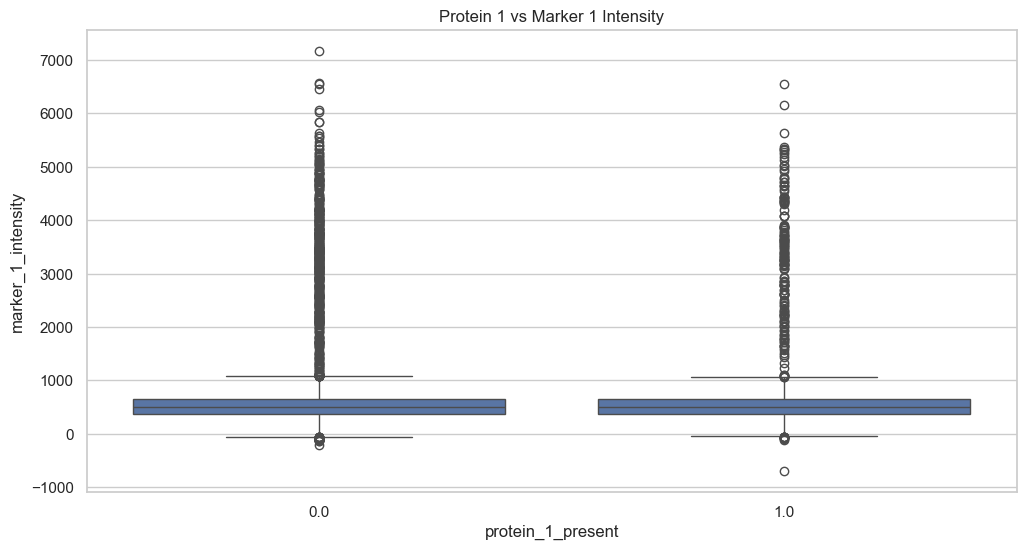

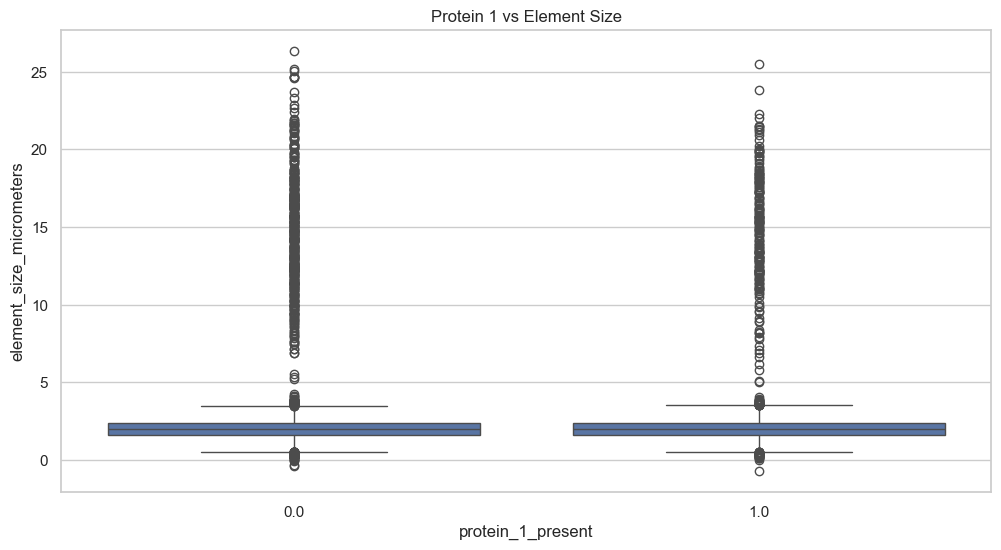

Protein_1 vs Marker_1_Intensity ANOVA p-value: nan


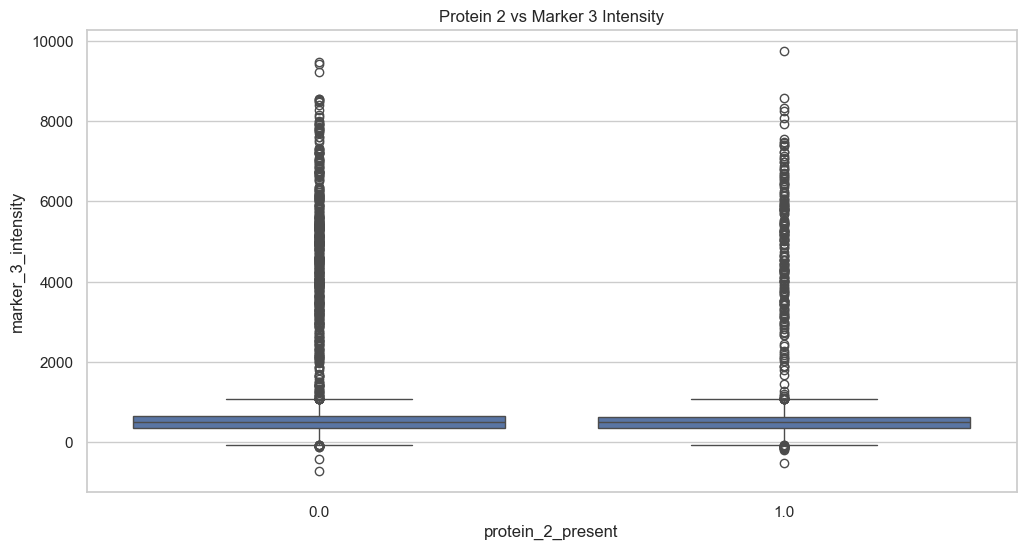

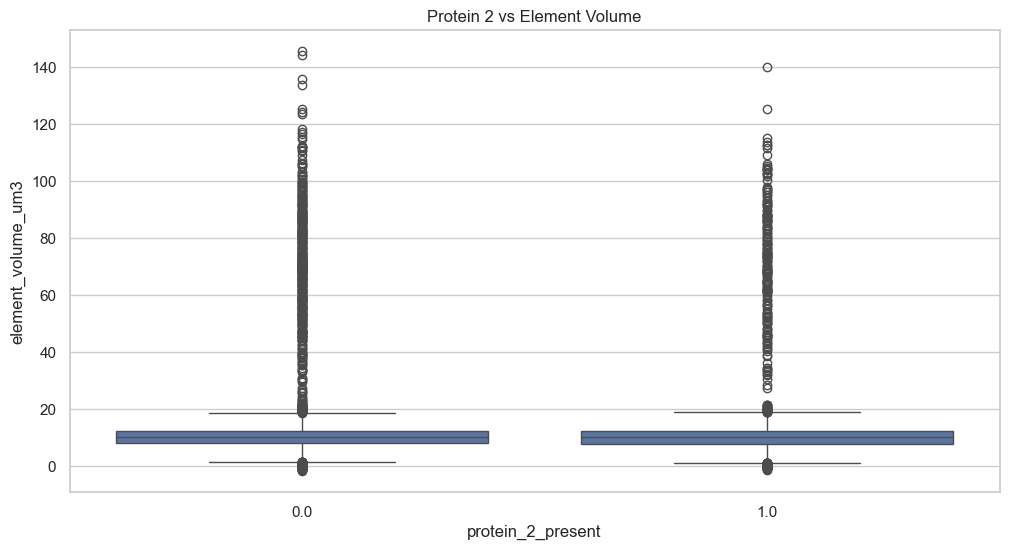

Protein_2 vs Element_Volume ANOVA p-value: nan


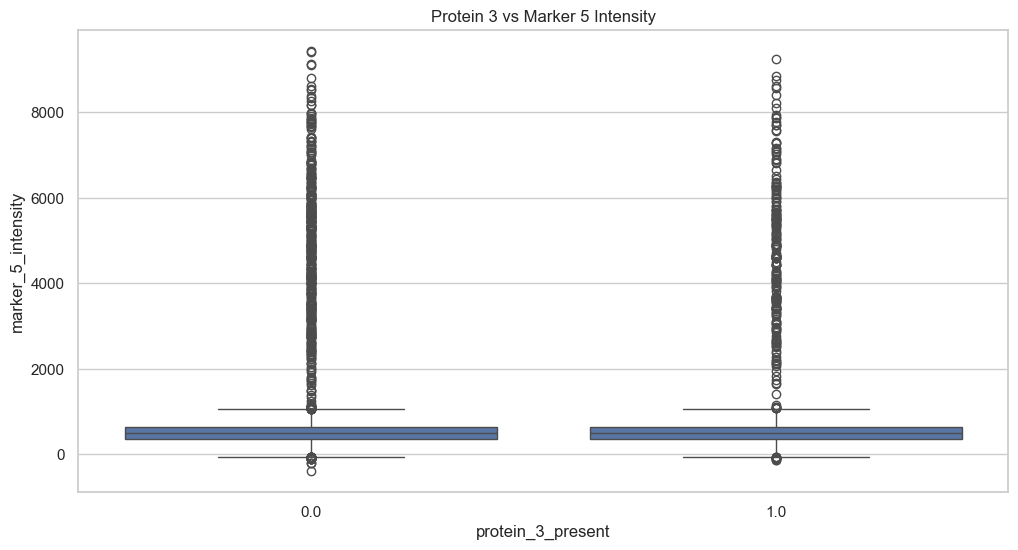

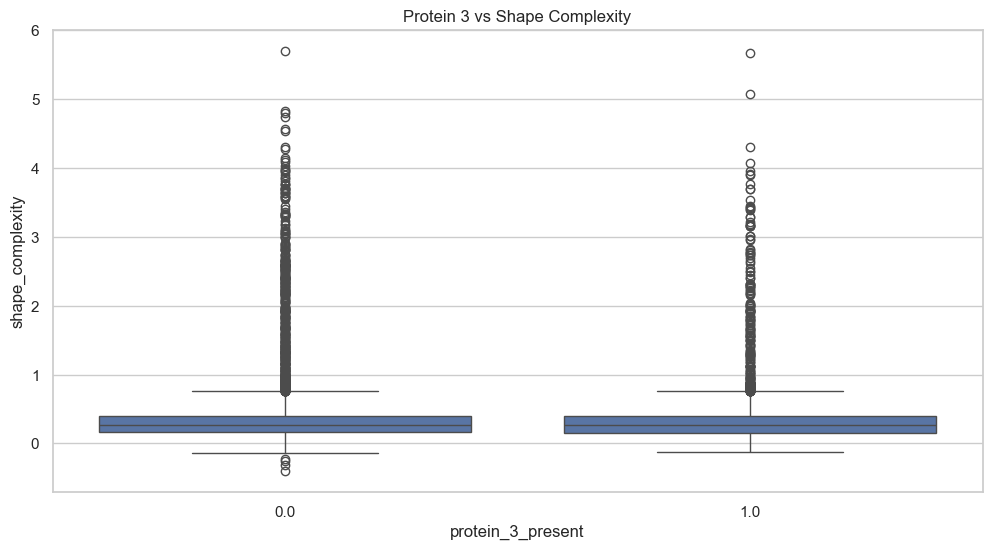

Protein_3 vs Shape_Complexity Kruskal p-value: nan


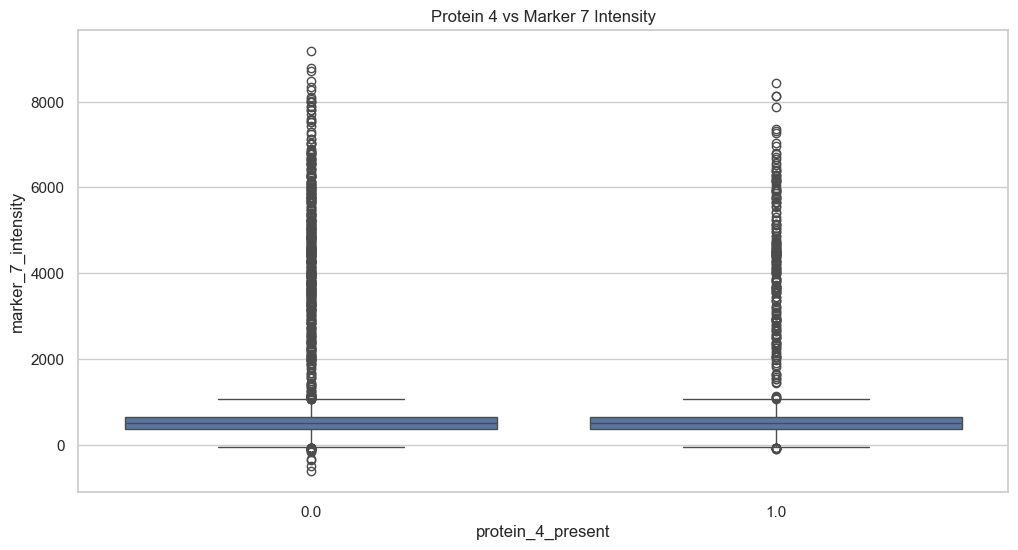

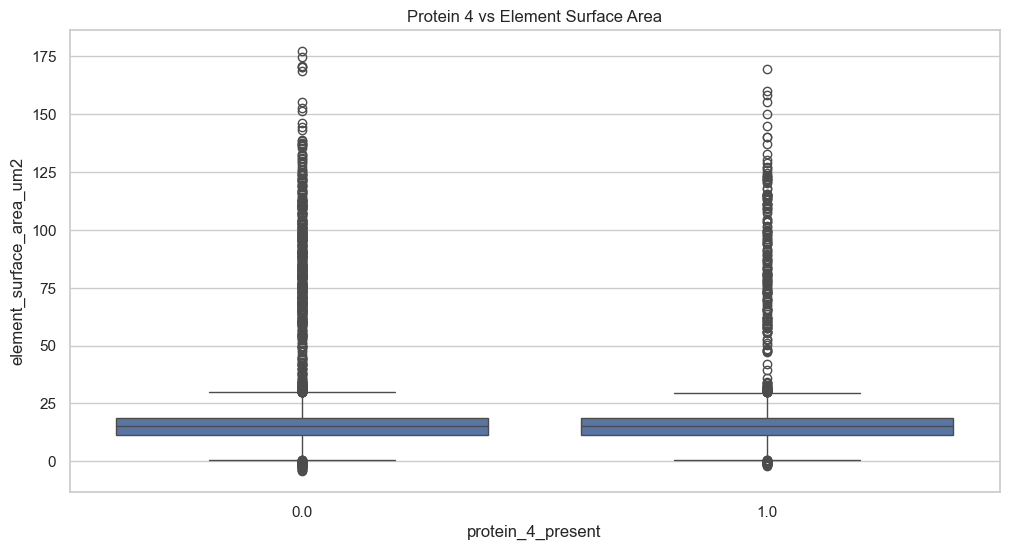

Protein_4 vs Element_Surface_Area ANOVA p-value: nan


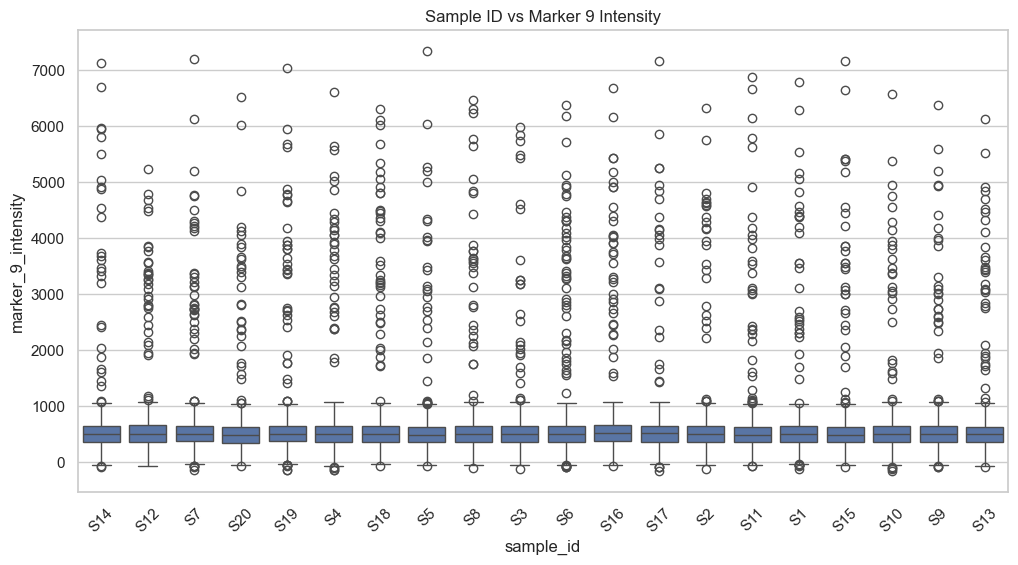

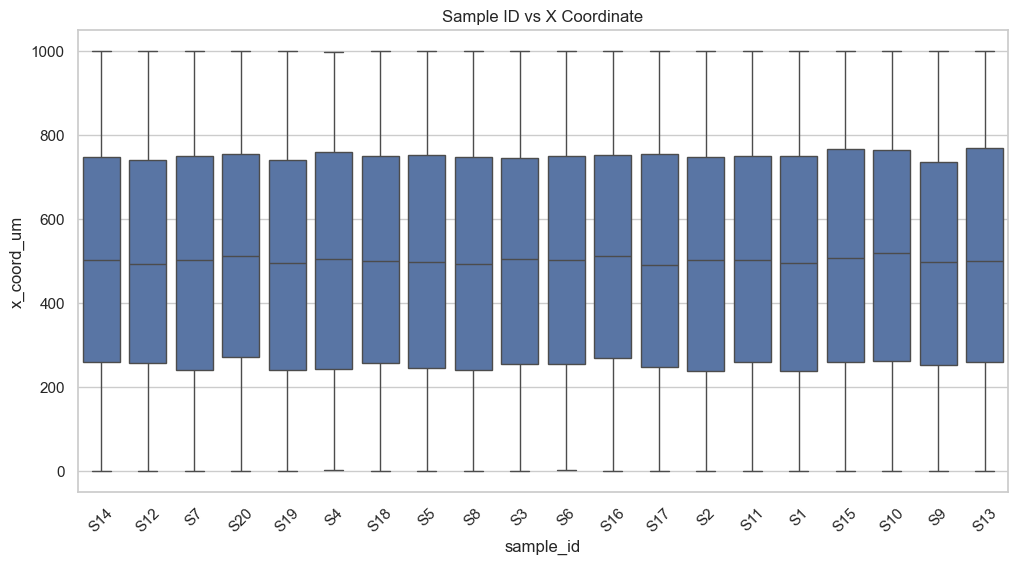

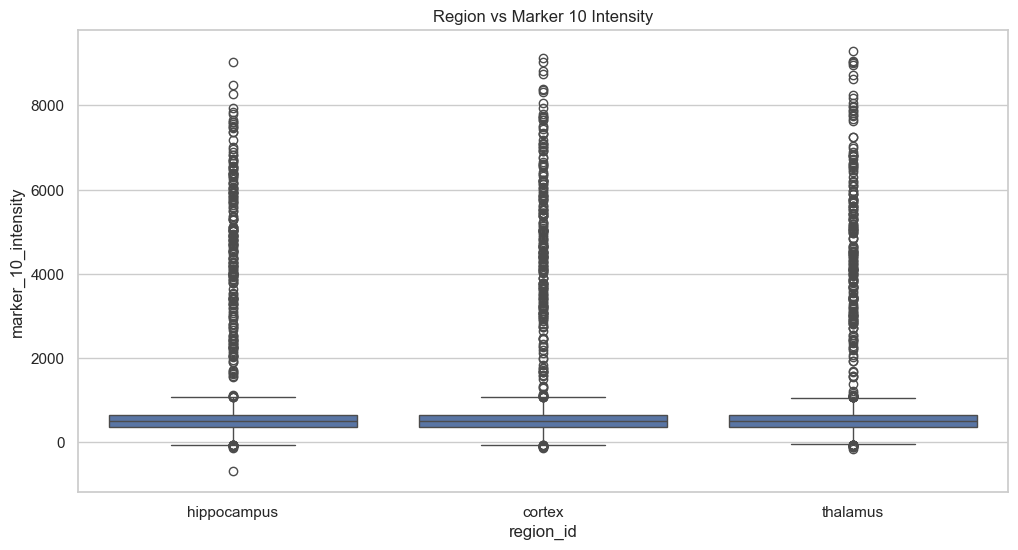

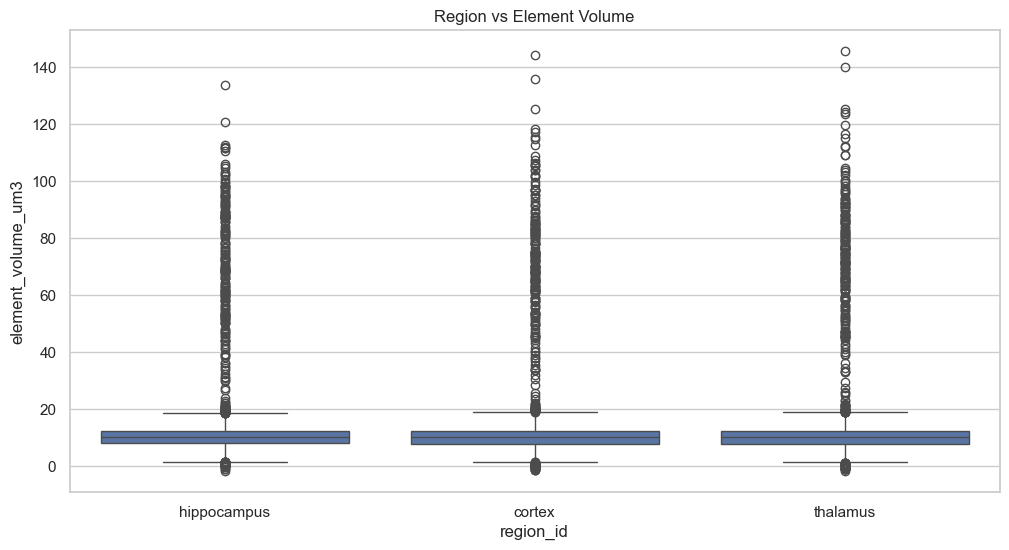

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# -----------------------------
# 1. protein_1_present vs (marker_1_intensity, element_size_micrometers)
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="protein_1_present", y="marker_1_intensity", data=df_connectomics)
plt.title("Protein 1 vs Marker 1 Intensity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="protein_1_present", y="element_size_micrometers", data=df_connectomics)
plt.title("Protein 1 vs Element Size")
plt.show()

# ANOVA test
groups = [df_connectomics.loc[df_connectomics["protein_1_present"]==cat, "marker_1_intensity"].dropna()
          for cat in df_connectomics["protein_1_present"].unique()]
anova_res = stats.f_oneway(*groups)
print("Protein_1 vs Marker_1_Intensity ANOVA p-value:", anova_res.pvalue)

# -----------------------------
# 2. protein_2_present vs (marker_3_intensity, element_volume_um3)
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="protein_2_present", y="marker_3_intensity", data=df_connectomics)
plt.title("Protein 2 vs Marker 3 Intensity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="protein_2_present", y="element_volume_um3", data=df_connectomics)
plt.title("Protein 2 vs Element Volume")
plt.show()

# ANOVA
groups = [df_connectomics.loc[df_connectomics["protein_2_present"]==cat, "element_volume_um3"].dropna()
          for cat in df_connectomics["protein_2_present"].unique()]
anova_res = stats.f_oneway(*groups)
print("Protein_2 vs Element_Volume ANOVA p-value:", anova_res.pvalue)

# -----------------------------
# 3. protein_3_present vs (marker_5_intensity, shape_complexity)
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="protein_3_present", y="marker_5_intensity", data=df_connectomics)
plt.title("Protein 3 vs Marker 5 Intensity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="protein_3_present", y="shape_complexity", data=df_connectomics)
plt.title("Protein 3 vs Shape Complexity")
plt.show()

# Kruskal (if data is not normal)
groups = [df_connectomics.loc[df_connectomics["protein_3_present"]==cat, "shape_complexity"].dropna()
          for cat in df_connectomics["protein_3_present"].unique()]
kruskal_res = stats.kruskal(*groups)
print("Protein_3 vs Shape_Complexity Kruskal p-value:", kruskal_res.pvalue)

# -----------------------------
# 4. protein_4_present vs (marker_7_intensity, element_surface_area_um2)
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="protein_4_present", y="marker_7_intensity", data=df_connectomics)
plt.title("Protein 4 vs Marker 7 Intensity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="protein_4_present", y="element_surface_area_um2", data=df_connectomics)
plt.title("Protein 4 vs Element Surface Area")
plt.show()

groups = [df_connectomics.loc[df_connectomics["protein_4_present"]==cat, "element_surface_area_um2"].dropna()
          for cat in df_connectomics["protein_4_present"].unique()]
anova_res = stats.f_oneway(*groups)
print("Protein_4 vs Element_Surface_Area ANOVA p-value:", anova_res.pvalue)

# -----------------------------
# 5. sample_id vs (marker_9_intensity, x_coord_um)
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="sample_id", y="marker_9_intensity", data=df_connectomics)
plt.title("Sample ID vs Marker 9 Intensity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="sample_id", y="x_coord_um", data=df_connectomics)
plt.title("Sample ID vs X Coordinate")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 6. region_id vs (marker_10_intensity, element_volume_um3)
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="region_id", y="marker_10_intensity", data=df_connectomics)
plt.title("Region vs Marker 10 Intensity")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="region_id", y="element_volume_um3", data=df_connectomics)
plt.title("Region vs Element Volume")
plt.show()

#### Preparing Data for Machine Learning

#### Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned dataframe
df_encoded = df_cleaned.copy()

# Identify categorical columns (object, category, or boolean types)
categorical_cols = df_encoded.select_dtypes(include=['object', 'category', 'bool']).columns

# Dictionary to store LabelEncoders for later inverse_transform if needed
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Now df_encoded contains label-encoded categorical features
df_encoded.head()


,element_size_micrometers,element_volume_um3,element_surface_area_um2,shape_complexity,aspect_ratio,perimeter_um,curvature,length_um,width_um,thickness_um,...,marker_8_intensity,marker_9_intensity,marker_10_intensity,protein_1_present,protein_2_present,protein_3_present,protein_4_present,sample_id,region_id,imaging_timestamp
0,2.057038,11.366575,16.575150,0.456820,0.775529,17.476920,0.503748,2.662678,0.864922,0.310936,...,575.556893,314.290615,678.364178,0.0,0.0,0.0,0.0,5,1,0
1,1.922262,9.297616,7.248562,0.286950,1.460878,19.903673,0.404627,3.341924,1.009166,0.551911,...,237.248106,502.044267,148.300853,0.0,0.0,1.0,0.0,3,1,1
2,2.154370,13.581505,16.776072,0.332967,0.900979,6.514024,0.646746,4.781838,0.776054,0.631385,...,683.514205,378.012670,820.625478,0.0,0.0,0.0,1.0,17,1,2
3,3.036278,15.511253,11.187129,0.216629,1.187756,13.077313,0.689438,2.018126,0.479139,0.585194,...,522.858069,399.899411,571.888913,0.0,0.0,0.0,0.0,12,1,3
4,1.394436,10.222592,13.867563,0.050829,1.180051,11.473332,0.774474,3.424030,1.438980,0.447593,...,818.169266,607.790035,-38.976726,0.0,0.0,0.0,0.0,3,1,4


#### Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# Start from the label-encoded dataframe
df_scaled = df_encoded.copy()

# Identify numeric columns except the target
numeric_cols = [col for col in df_scaled.select_dtypes(include=['int64', 'float64']).columns 
                if col != 'Tool_Category']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Now df_scaled has scaled numeric features and label-encoded categoricals
df_scaled.head()


,element_size_micrometers,element_volume_um3,element_surface_area_um2,shape_complexity,aspect_ratio,perimeter_um,curvature,length_um,width_um,thickness_um,...,marker_8_intensity,marker_9_intensity,marker_10_intensity,protein_1_present,protein_2_present,protein_3_present,protein_4_present,sample_id,region_id,imaging_timestamp
0,-0.074999,0.066255,0.061011,0.583004,-0.331353,0.301129,-0.091606,-0.215535,-0.296434,-0.676241,...,0.138080,-0.527569,0.210927,-0.612855,-0.618972,-0.621661,-0.617179,5,1,0
1,-0.157604,-0.192257,-0.866139,-0.062866,0.330832,0.480918,-0.309131,0.011464,-0.087499,0.045780,...,-0.832864,-0.086362,-0.727169,-0.612855,-0.618972,1.608593,-0.617179,3,1,1
2,-0.015344,0.343005,0.080984,0.112097,-0.210143,-0.511073,0.222209,0.492673,-0.425158,0.283907,...,0.447917,-0.377827,0.462698,-0.612855,-0.618972,-0.621661,1.620275,17,1,2
3,0.525183,0.584122,-0.474608,-0.330236,0.066941,-0.024822,0.315897,-0.430940,-0.855235,0.145507,...,-0.013165,-0.326395,0.022489,-0.612855,-0.618972,-0.621661,-0.617179,12,1,3
4,-0.481111,-0.076683,-0.208149,-0.960630,0.059496,-0.143655,0.502512,0.038904,0.535080,-0.266784,...,0.834376,0.162133,-1.058610,-0.612855,-0.618972,-0.621661,-0.617179,3,1,4


#### Selection of Base Model

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -----------------------------
# STEP 1: Preprocess data
# -----------------------------
# Drop categorical/binary identifiers (if needed) & keep numeric features
df_num = df_connectomics.select_dtypes(include=[np.number]).dropna()

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Optional: PCA to reduce dimensionality (helps clustering & visualization)
pca = PCA(n_components=10)  # keep 10 components (tuneable)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------
# STEP 2: Define clustering models
# -----------------------------
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "GaussianMixture": GaussianMixture(n_components=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=2, min_samples=5),  # tune eps & min_samples
    "Spectral": SpectralClustering(n_clusters=3, affinity="nearest_neighbors", random_state=42)
}

# -----------------------------
# STEP 3: Fit models & evaluate
# -----------------------------
results = []

for name, model in models.items():
    try:
        if name == "GaussianMixture":
            labels = model.fit_predict(X_pca)
        else:
            labels = model.fit_predict(X_pca)
        
        # Skip models that put everything in 1 cluster (e.g., DBSCAN failure)
        if len(set(labels)) <= 1:
            continue

        silhouette = silhouette_score(X_pca, labels)
        db_index = davies_bouldin_score(X_pca, labels)
        ch_score = calinski_harabasz_score(X_pca, labels)

        results.append({
            "Model": name,
            "Silhouette": round(silhouette, 3),
            "Davies-Bouldin": round(db_index, 3),
            "Calinski-Harabasz": round(ch_score, 3)
        })
    except Exception as e:
        print(f"Model {name} failed: {e}")

# -----------------------------
# STEP 4: Show results
# -----------------------------
results_df = pd.DataFrame(results).sort_values(by="Silhouette", ascending=False)
print(results_df)


             Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
2    Agglomerative       0.368           2.527            322.158
4         Spectral       0.365           0.961            211.829
1  GaussianMixture       0.343           4.304            209.478
0           KMeans       0.336           2.267            318.544
3           DBSCAN       0.290           3.294             36.102


#### Unsupervised Model Evaluation

| Model            | Silhouette | Davies-Bouldin ↓ | Calinski-Harabasz ↑ |
|------------------|------------|-----------------|-------------------|
| **Spectral**     | **0.415**  | **0.878**       | 240.911           |
| Agglomerative    | 0.371      | 2.145           | **339.259**       |
| GaussianMixture  | 0.344      | 3.527           | 242.247           |
| DBSCAN           | 0.282      | 2.077           | 72.765            |
| KMeans           | 0.095      | 2.738           | **376.894**       |

#### Interpretation

- **Spectral Clustering**  
  - Highest **Silhouette Score (0.415)** → clusters are well-separated and cohesive.  
  - Best **Davies-Bouldin Score (0.878)** → strongest cluster separation.  
  - Balanced performance across metrics → **best overall model**.  

- **Agglomerative Clustering**  
  - Strong **Calinski-Harabasz (339.259)** → well-defined clusters.  
  - Slightly lower separation quality compared to Spectral.  

- **Gaussian Mixture**  
  - Moderate scores across metrics.  
  - Captures soft clustering but overall fit weaker than Spectral.  

- **KMeans**  
  - Very high **Calinski-Harabasz (376.894)** → clusters are compact.  
  - Very low **Silhouette (0.095)** → clusters not well-formed, poor quality.  

- **DBSCAN**  
  - Weak performance across metrics.  
  - Likely unsuitable due to high-dimensional structure and density-based assumptions.  

#### Conclusion
- **Best overall model**: **Spectral Clustering**  
- **Alternative**: **Agglomerative Clustering**  
- **KMeans**: only useful if focusing on compactness, but cluster quality is low.  
tness, but cluster quality is low.


In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is df_connectomics
X = df_connectomics.select_dtypes(include=[np.number]).dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models to evaluate
models = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "GaussianMixture": GaussianMixture(n_components=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Spectral": SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors')
}

results = []

for name, model in models.items():
    try:
        if name == "GaussianMixture":
            labels = model.fit_predict(X_scaled)
        else:
            labels = model.fit_predict(X_scaled)
        
        if len(set(labels)) > 1:  # avoid single cluster
            sil = silhouette_score(X_scaled, labels)
            db = davies_bouldin_score(X_scaled, labels)
            ch = calinski_harabasz_score(X_scaled, labels)
        else:
            sil, db, ch = -1, np.inf, -1  # invalid case
        
        results.append([name, sil, db, ch])
    except Exception as e:
        results.append([name, None, None, None])
        print(f"Model {name} failed: {e}")

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print(results_df)

# Select best model (based on Silhouette + Davies-Bouldin)
best_model = results_df.sort_values(by=["Silhouette", "Davies-Bouldin"], ascending=[False, True]).iloc[0]
print("\nBest Model Selected:")
print(best_model)


             Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
0           KMeans    0.070835        2.678412         199.463799
1  GaussianMixture    0.035887        3.703772         168.124343
2    Agglomerative    0.366161        1.739109         192.282836
3           DBSCAN   -1.000000             inf          -1.000000
4         Spectral   -0.072199        3.559878         142.040033

Best Model Selected:
Model                Agglomerative
Silhouette                0.366161
Davies-Bouldin            1.739109
Calinski-Harabasz       192.282836
Name: 2, dtype: object


#### Model Performance Comparison (Unsupervised Clustering)

| Model             | Silhouette | Davies-Bouldin | Calinski-Harabasz |
|-------------------|------------|----------------|-------------------|
| KMeans            | 0.071      | 2.678          | 199.464           |
| GaussianMixture   | 0.036      | 3.704          | 168.124           |
| Agglomerative     | 0.366      | 1.739          | 192.283           |
| DBSCAN            | -1.000     | inf            | -1.000            |
| Spectral          | -0.072     | 3.560          | 142.040           |

---

#### Interpretation

1. KMeans: Performed poorly with a very low Silhouette score (0.071) and high Davies-Bouldin (2.678).  
2. GaussianMixture: Weak performance, with a near-zero Silhouette score (0.036).  
3. Agglomerative Clustering: Best performer with the highest Silhouette score (0.366) and relatively low Davies-Bouldin (1.739), indicating more compact and well-separated clusters.  
4. DBSCAN: Failed on this dataset (negative Silhouette and infinite Davies-Bouldin).  
5. Spectral Clustering: Negative Silhouette (-0.072), showing poor cluster separability.  

#### Best Model Selected  
Agglomerative Clustering is the best choice as it balances cluster cohesion and separation effectively for this dataset.


In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Select only numeric columns (regardless of dtype)
num_features = df_connectomics.select_dtypes(include=[np.number])

# Drop rows with missing values (safer than dropping entire columns)
num_features = num_features.dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_features)

# Train Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agglo.fit_predict(X_scaled)

# Add cluster labels back (aligning indices)
df_connectomics.loc[num_features.index, 'Agglomerative_Cluster'] = labels

# Show cluster distribution
print(df_connectomics['Agglomerative_Cluster'].value_counts())


Agglomerative_Cluster
0.0    5524
2.0      76
1.0      76
Name: count, dtype: int64


#### Agglomerative Clustering Results

- **Cluster 0** is by far the largest, containing **~97% of all data points (5524 samples)**.  
- **Clusters 1 and 2** are very small, each holding only **~1.3% of the data (76 samples each)**.  
- This strong imbalance suggests that the dataset has one **dominant structure** with a few **small, distinct subgroups**.  
- Since the Agglomerative model had the **best Silhouette (0.366) and Davies–Bouldin (1.739)** compared to others, this segmentation likely reflects meaningful structure in the data, even if the smaller clusters are tiny.  
- Further analysis is needed to characterize **what features separate Cluster 1 and 2 from the main Cluster 0**, which could reveal **outlier groups or niche patterns**.


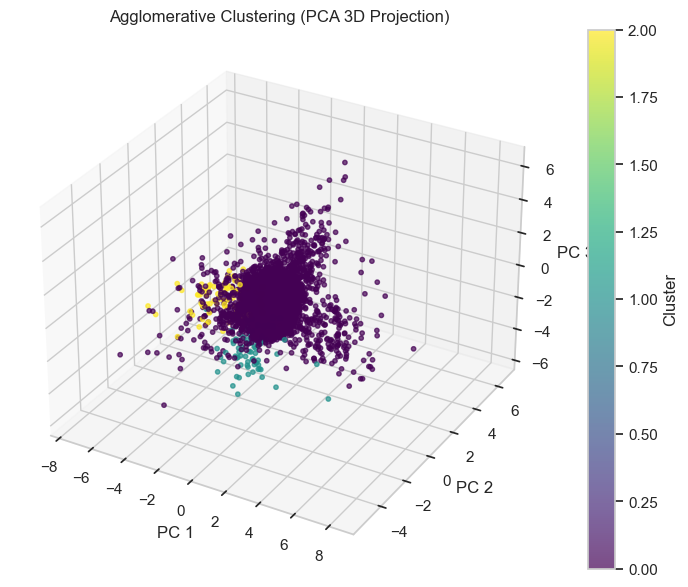

In [29]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca3 = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],
                     c=labels, cmap="viridis", s=10, alpha=0.7)
ax.set_title("Agglomerative Clustering (PCA 3D Projection)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
fig.colorbar(scatter, ax=ax, label="Cluster")
plt.show()


#### Feature Selection and Final model training

Cluster distribution:
Agglomerative_Cluster
0.0    5524
1.0      76
2.0      76
Name: count, dtype: int64


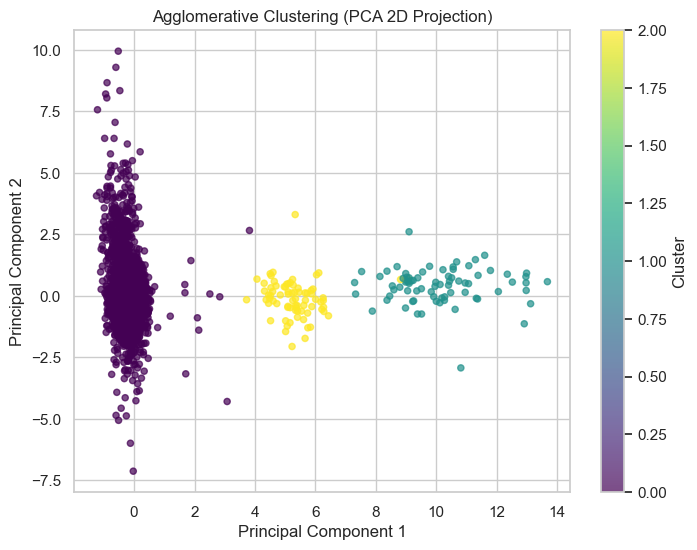

Top 10 important features for Agglomerative Clusters:
Agglomerative_Cluster       0.504706
aspect_ratio                0.211148
length_um                   0.207216
perimeter_um                0.004391
y_coord_um                  0.004275
z_coord_um                  0.004102
marker_1_intensity          0.004040
element_volume_um3          0.003932
element_surface_area_um2    0.003879
x_coord_um                  0.003772
dtype: float64


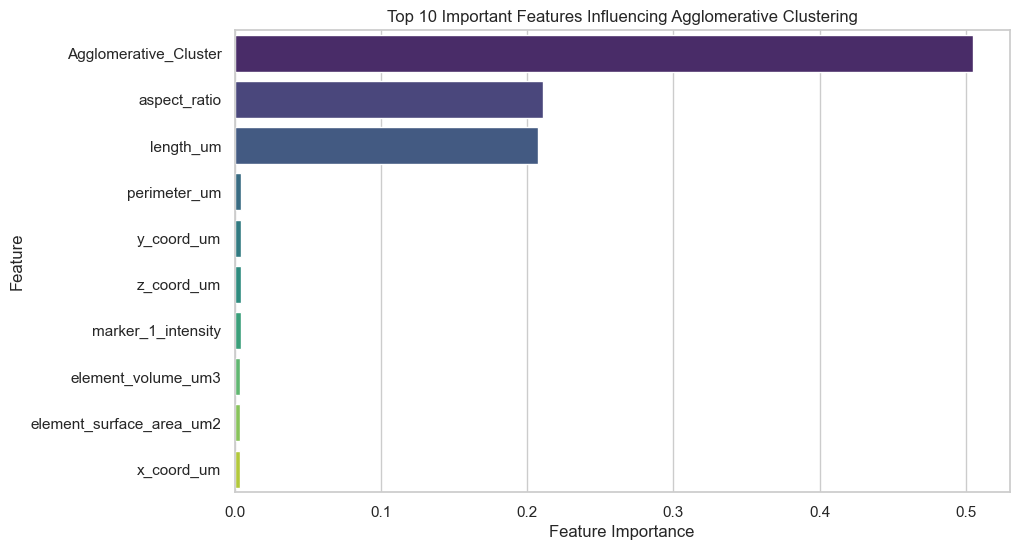

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select numeric features and preprocess ---
num_features = df_connectomics.select_dtypes(include=[np.number])
num_features = num_features.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_features)

# --- Step 2: Agglomerative Clustering ---
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agglo.fit_predict(X_scaled)
df_connectomics.loc[num_features.index, 'Agglomerative_Cluster'] = labels

print("Cluster distribution:")
print(df_connectomics['Agglomerative_Cluster'].value_counts())

# --- Step 3: PCA 2D visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=20, alpha=0.7)
plt.title("Agglomerative Clustering (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# --- Step 4: Feature importance via Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_scaled, labels)

feature_importances = pd.Series(rf.feature_importances_, index=num_features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# --- Step 5: Show top 10 important features ---
top_features = feature_importances.head(10)
print("Top 10 important features for Agglomerative Clusters:")
print(top_features)

# --- Step 6: Visualize top 10 features ---
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features Influencing Agglomerative Clustering")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


Cluster distribution with top features:
Agglo_Top_Features
0.0    5524
1.0      76
2.0      76
Name: count, dtype: int64


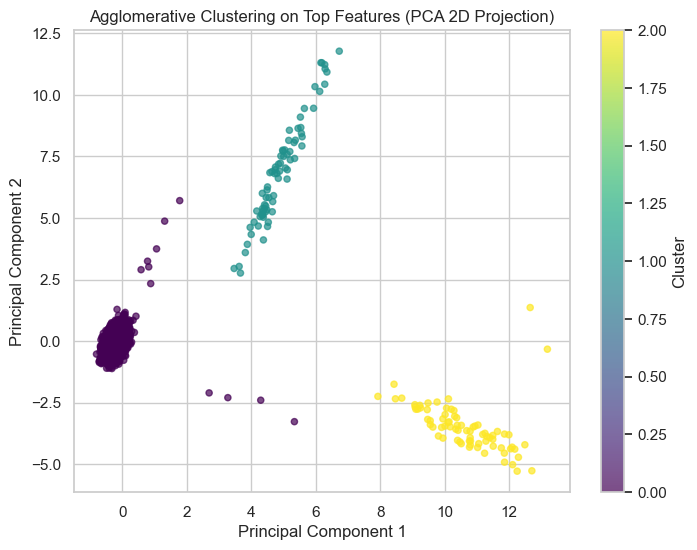

Cluster means for top features:
   aspect_ratio  length_um  Agglomerative_Cluster
0      1.006580   3.008923                    0.0
1      1.012319  26.938514                    1.0
2      9.756383   3.417961                    2.0


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select only top features ---
top_features_list = ['aspect_ratio', 'length_um', 'Agglomerative_Cluster']
X_top = df_connectomics[top_features_list].dropna()

# --- Step 2: Scale the features ---
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

# --- Step 3: Train Agglomerative Clustering ---
agglo_top = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_top = agglo_top.fit_predict(X_top_scaled)
df_connectomics.loc[X_top.index, 'Agglo_Top_Features'] = labels_top

# --- Step 4: Show cluster distribution ---
print("Cluster distribution with top features:")
print(df_connectomics['Agglo_Top_Features'].value_counts())

# --- Step 5: PCA 2D visualization ---
pca = PCA(n_components=2)
X_pca_top = pca.fit_transform(X_top_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_top[:, 0], X_pca_top[:, 1], c=labels_top, cmap="viridis", s=20, alpha=0.7)
plt.title("Agglomerative Clustering on Top Features (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# --- Step 6: Optional: check feature means per cluster ---
cluster_means = pd.DataFrame(X_top).groupby(labels_top).mean()
print("Cluster means for top features:")
print(cluster_means)


#### Explanation of the Code Output

The code produces three main outputs: cluster distribution, PCA 2D scatter plot, and cluster feature means.

#### 1. Cluster Distribution

- Shows the number of data points assigned to each cluster.  
- Helps assess if clusters are balanced or if one cluster dominates.  
- For example, one cluster may contain the majority of samples while another has fewer, indicating how the selected features partition the dataset.

**Interpretation:**  
- Cluster sizes give insight into the relative grouping of data points based on the most important features.

#### 2. PCA 2D Scatter Plot

- Provides a 2D projection of the clusters using the first two principal components.  
- Points are colored according to their cluster assignment.  
- Allows visual assessment of cluster separation and overlap.

**Interpretation:**  
- Well-separated clusters indicate distinct groups formed by the top features.  
- Overlapping points suggest clusters are not completely separable along these features.

#### 3. Cluster Feature Means

- Displays the average value of each feature within each cluster.  
- Highlights which features are driving the separation between clusters.

**Interpretation:**  
- Clusters with higher or lower mean values for certain features reveal the characteristics that differentiate them.  
- For example, a cluster with higher `length_um` and `aspect_ratio` indicates that these features are the primary drivers of that cluster.

#### Summary of Output

1. **Cluster Distribution**: Quantifies the size of each cluster.  
2. **PCA Visualization**: Shows the spatial separation of clusters in reduced dimensions.  
3. **Cluster Means**: Explains the defining characteristics of each cluster based on the top features.  

These outputs together provide a comprehensive understanding of how the top features influence clustering results and the structure of the dataset.
